In [1]:
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.kde import gaussian_kde
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/tracylee/raw_dogs/clean_without_text.csv')

In [4]:
binary_fields = [u'animalAltered',u'animalDeclawed', u'animalHousetrained',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',
       u'animalSpecialneeds', u'animalUptodate', 
       u'in_foster', u'Highly Active', u'Not Active',
       u'Slightly Active', u'animalAlterUnknown', u'animalDeclawedUnknown',
       u'animalMicrochippedUnknown', u'Adult', u'Baby', u'Senior', u'Young',
       u'Large', u'Medium', u'Small', u'X-Large', u'Indoor Only',
       u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive', u'Cautious',
       u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',
       u'animalOKWithDogsUnknown', u'animalOKWithKidsUnknown',
       u'animalSpecialneedsUnknown', u'animalUptodateUnknown', u'mostly_black',
       u'sex_male']

continuous_fields = [u'animalAdoptionFee',u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalNumPictures', u'animalNumVideos',
       u'animalSizeCurrent', u'animalSizePotential', u'age_at_start', 
       u'description_length',u'search_string_num_terms']

In [17]:
df = df[[u'animalAdoptionFee', u'animalAltered',
       u'animalBiggestPictures', u'animalBiggestVideos', u'animalDeclawed',
       u'animalHousetrained', u'animalMicrochipped', u'animalMixedBreed',
       u'animalNeedsFoster', u'animalNumPictures', u'animalNumVideos',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',
       u'animalOrgID', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'adopted', u'censored',
       u'time_range', u'age_at_start', u'has_url', u'in_foster',
       u'Highly Active', u'Not Active', u'Slightly Active',
       u'animalAlterUnknown', u'animalDeclawedUnknown',
       u'animalMicrochippedUnknown', u'Adult', u'Baby', u'Senior', u'Young',
       u'Large', u'Medium', u'Small', u'X-Large', u'Indoor Only',
       u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive', u'Cautious',
       u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',
       u'animalOKWithDogsUnknown', u'animalOKWithKidsUnknown',
       u'animalSpecialneedsUnknown', u'animalUptodateUnknown', u'mostly_black',
       u'tempAge', u'search_string_num_terms', u'sex_male',
       u'description_length']]

In [13]:
corr=df[continuous_fields+['time_range']].corr()

In [14]:
corr

,animalAdoptionFee,animalBiggestPictures,animalBiggestVideos,animalNumPictures,animalNumVideos,animalSizeCurrent,animalSizePotential,age_at_start,description_length,search_string_num_terms,time_range
animalAdoptionFee,1.000000,-0.005791,7.162458e-02,-1.217445e-02,-8.190106e-03,-0.029007,0.027704,-0.136037,0.080360,-0.018122,-0.032136
animalBiggestPictures,-0.005791,1.000000,-2.534159e-03,4.217802e-01,1.619268e-02,-0.037374,0.013203,0.028967,0.079465,0.035578,-0.126985
animalBiggestVideos,0.071625,-0.002534,1.000000e+00,8.336096e-13,-8.012211e-14,-0.014737,0.035246,-0.003206,0.037996,0.039884,-0.281022
animalNumPictures,-0.012174,0.421780,8.336096e-13,1.000000e+00,9.436263e-02,-0.029455,0.002253,0.014567,0.207613,0.069167,-0.164327
animalNumVideos,-0.008190,0.016193,-8.012211e-14,9.436263e-02,1.000000e+00,-0.001152,0.001696,0.013952,0.097358,0.048277,-0.059499
animalSizeCurrent,-0.029007,-0.037374,-1.473684e-02,-2.945469e-02,-1.152044e-03,1.000000,0.584475,0.001434,-0.017723,-0.015590,0.001864
animalSizePotential,0.027704,0.013203,3.524608e-02,2.253026e-03,1.696110e-03,0.584475,1.000000,0.042149,-0.033723,-0.021745,-0.068801
age_at_start,-0.136037,0.028967,-3.206082e-03,1.456749e-02,1.395170e-02,0.001434,0.042149,1.000000,0.089102,-0.129072,-0.015292
description_length,0.080360,0.079465,3.799556e-02,2.076125e-01,9.735819e-02,-0.017723,-0.033723,0.089102,1.000000,0.101586,-0.075840
search_string_num_terms,-0.018122,0.035578,3.988413e-02,6.916741e-02,4.827688e-02,-0.015590,-0.021745,-0.129072,0.101586,1.000000,-0.002586


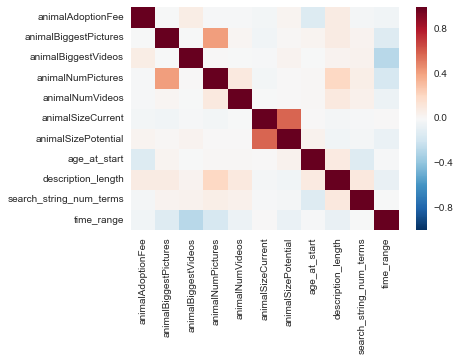

In [15]:
sns.heatmap(corr)

In [18]:
corr2 = df.corr()

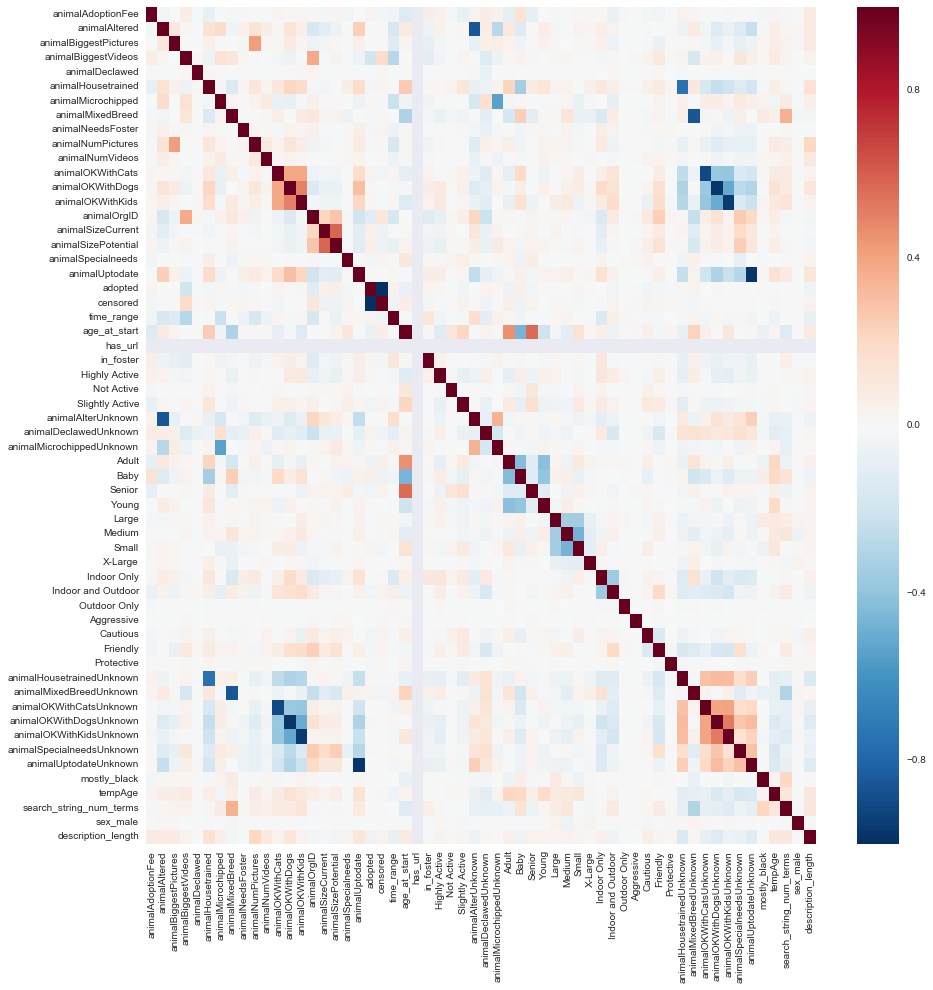

In [24]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(corr2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x155b3b6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1593762d0>]], dtype=object)

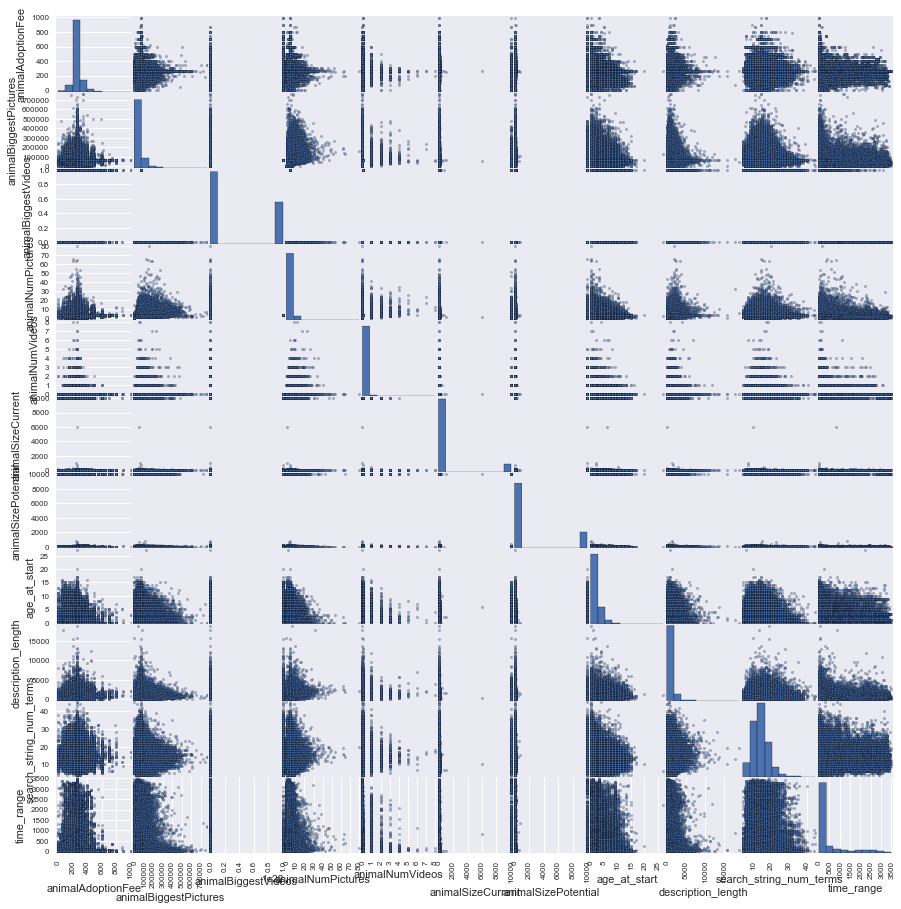

In [27]:
pd.scatter_matrix(df[continuous_fields+['time_range']])

(0, 200)

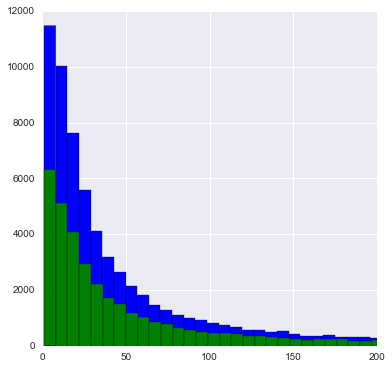

In [41]:
plt.rcParams['figure.figsize']=(6,6)
plt.hist(df[df['animalAltered']==1]['time_range'], color='blue', bins=500)
plt.hist(df[df['animalAlterUnknown']==1]['time_range'], color='green', bins=500)
plt.xlim(0,200)

In [42]:
df['adopted'].sum()

146443

In [57]:
counts= pd.DataFrame(df[binary_fields].sum())
counts.columns = ['counts']
counts.sort('counts', ascending=False)

/Users/tracylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,counts
animalDeclawedUnknown,118324.0
animalOKWithDogs,117126.0
animalUptodate,112093.0
animalMixedBreed,99679.0
animalOKWithKids,91019.0
animalOKWithCatsUnknown,84753.0
animalAltered,82506.0
animalMicrochippedUnknown,77387.0
sex_male,76271.0
animalHousetrainedUnknown,74216.0


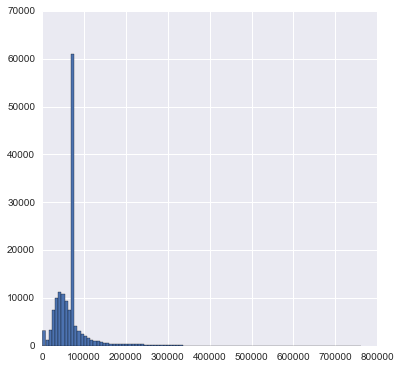

In [59]:
df['animalBiggestPictures'].hist(bins=100)

In [61]:
clean_df = pd.read_csv('/Users/tracylee/raw_dogs/clean_without_dummies_5_nodead.csv')

In [70]:
clean_df.columns

Index([u'Unnamed: 0', u'animalActivityLevel', u'animalAdoptionFee',
       u'animalAltered', u'animalBiggestPictures', u'animalBiggestVideos',
       u'animalBreed', u'animalColor', u'animalDeclawed',
       u'animalDescriptionPlain', u'animalGeneralAge',
       u'animalGeneralSizePotential', u'animalHousetrained',
       u'animalIndoorOutdoor', u'animalLocationState', u'animalMicrochipped',
       u'animalMixedBreed', u'animalNeedsFoster', u'animalNewPeople',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalPrimaryBreed', u'animalSearchString', u'animalSecondaryBreed',
       u'animalSex', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'start_date', u'end_date',
       u'adopted', u'censored', u'time_range', u'age_at_start', u'has_url',
       u'in_foster', u'mostly_black', u'search_string_num_terms',
       u'description_length'],
     

In [64]:
df.columns

Index([u'animalAdoptionFee', u'animalAltered', u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalDeclawed', u'animalHousetrained',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalSizeCurrent', u'animalSizePotential', u'animalSpecialneeds',
       u'animalUptodate', u'adopted', u'censored', u'time_range',
       u'age_at_start', u'has_url', u'in_foster', u'Highly Active',
       u'Not Active', u'Slightly Active', u'animalAlterUnknown',
       u'animalDeclawedUnknown', u'animalMicrochippedUnknown', u'Adult',
       u'Baby', u'Senior', u'Young', u'Large', u'Medium', u'Small', u'X-Large',
       u'Indoor Only', u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive',
       u'Cautious', u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',

In [65]:
clean_df['mostly_black'] = clean_df['animalColor'].apply(lambda x: 1 if str(x)[:5]=="Black" else 0)

In [66]:
clean_df['search_string_num_terms'] = clean_df['animalSearchString'].apply(lambda x: len(str(x).split()))

In [68]:
clean_df['description_length'] = clean_df['animalDescriptionPlain'].apply(lambda x: len(str(x)))

In [69]:
clean_df.head()

,Unnamed: 0,animalActivityLevel,animalAdoptionFee,animalAltered,animalBiggestPictures,animalBiggestVideos,animalBreed,animalColor,animalDeclawed,animalDescriptionPlain,...,end_date,adopted,censored,time_range,age_at_start,has_url,in_foster,mostly_black,search_string_num_terms,description_length
0,0,NaN,NaN,1.0,96769.0,0.0,Boxer,NaN,NaN,IN NEED OF A FOSTER HOME UNTIL I CAN BE ADOPTE...,...,2012-04-22,1,0,47,7.0,1,0,0,5,1095
1,1,Moderately Active,NaN,1.0,95768.0,0.0,Labrador Retriever / Boxer / Mixed,Black,NaN,"Hi! My name is Bianca, and if you can believe ...",...,2010-11-23,1,0,136,5.0,1,0,1,13,478
2,2,Moderately Active,NaN,1.0,98461.0,0.0,Labrador Retriever / Boxer / Mixed,NaN,NaN,"I'm Mick, and I think I'm pretty darn handsome...",...,2010-11-23,1,0,136,5.0,1,0,0,10,794
3,3,NaN,NaN,1.0,84752.0,0.0,Boxer,NaN,NaN,IN NEED OF FOSTER CARE UNTIL I CAN BE ADOPTED....,...,2010-01-23,1,0,33,2.0,1,0,0,7,642
4,4,Moderately Active,$400.00,1.0,64542.0,0.0,Poodle (Toy),White,NaN,Pierre is a petite little man with short legs ...,...,2016-08-05,1,0,2562,3.0,1,0,0,8,965


In [71]:
clean_df = clean_df[[u'animalActivityLevel', u'animalAdoptionFee',
       u'animalAltered', u'animalBiggestPictures', u'animalBiggestVideos',
       u'animalBreed', u'animalColor', u'animalDeclawed',
       u'animalDescriptionPlain', u'animalGeneralAge',
       u'animalGeneralSizePotential', u'animalHousetrained',
       u'animalIndoorOutdoor', u'animalLocationState', u'animalMicrochipped',
       u'animalMixedBreed', u'animalNeedsFoster', u'animalNewPeople',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalPrimaryBreed', u'animalSearchString', u'animalSecondaryBreed',
       u'animalSex', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'start_date', u'end_date',
       u'adopted', u'censored', u'time_range', u'age_at_start', u'has_url',
       u'in_foster', u'mostly_black', u'search_string_num_terms',
       u'description_length']]

In [120]:
clean_df.to_csv('/Users/tracylee/raw_dogs/clean_data_no_dummies.csv')

In [81]:
shit= pd.read_csv('/Users/tracylee/raw_dogs/clean_data_no_dummies.csv')

In [83]:
shit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 44 columns):
Unnamed: 0                    152259 non-null int64
animalActivityLevel           100425 non-null object
animalAdoptionFee             59376 non-null object
animalAltered                 94550 non-null float64
animalBiggestPictures         96174 non-null float64
animalBiggestVideos           96174 non-null float64
animalBreed                   152259 non-null object
animalColor                   124753 non-null object
animalDeclawed                32541 non-null float64
animalDescriptionPlain        143750 non-null object
animalGeneralAge              138897 non-null object
animalGeneralSizePotential    131268 non-null object
animalHousetrained            76945 non-null float64
animalIndoorOutdoor           81539 non-null object
animalLocationState           152259 non-null object
animalMicrochipped            73922 non-null float64
animalMixedBreed              110778 non-nul

In [91]:
shit['animalSex'].fillna('Female',inplace=True)

In [92]:
shit['animalSex'].value_counts()

Male      76275
Female    75984
Name: animalSex, dtype: int64

In [93]:
shit['animalDescriptionPlain'].fillna('', inplace=True)

In [95]:
shit = shit[shit['age_at_start']>=0]

In [96]:
shit.shape

(127634, 44)

In [97]:
clean_df.shape

(152259, 43)

In [99]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 43 columns):
animalActivityLevel           100425 non-null object
animalAdoptionFee             59376 non-null object
animalAltered                 94550 non-null float64
animalBiggestPictures         96174 non-null float64
animalBiggestVideos           96174 non-null float64
animalBreed                   152259 non-null object
animalColor                   124753 non-null object
animalDeclawed                32541 non-null float64
animalDescriptionPlain        152259 non-null object
animalGeneralAge              138897 non-null object
animalGeneralSizePotential    131268 non-null object
animalHousetrained            76945 non-null float64
animalIndoorOutdoor           81539 non-null object
animalLocationState           152259 non-null object
animalMicrochipped            73922 non-null float64
animalMixedBreed              110778 non-null float64
animalNeedsFoster             142862 non-n

In [100]:
df.shape

(150585, 58)

In [106]:
clean_df['has_video'] = clean_df['animalNumVideos'].apply(lambda x: 1 if x>0 else 0)

In [107]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 44 columns):
animalActivityLevel           100425 non-null object
animalAdoptionFee             59376 non-null object
animalAltered                 94550 non-null float64
animalBiggestPictures         96174 non-null float64
animalBiggestVideos           96174 non-null float64
animalBreed                   152259 non-null object
animalColor                   124753 non-null object
animalDeclawed                32541 non-null float64
animalDescriptionPlain        152259 non-null object
animalGeneralAge              138897 non-null object
animalGeneralSizePotential    131268 non-null object
animalHousetrained            76945 non-null float64
animalIndoorOutdoor           81539 non-null object
animalLocationState           152259 non-null object
animalMicrochipped            73922 non-null float64
animalMixedBreed              110778 non-null float64
animalNeedsFoster             142862 non-n

In [109]:
clean_df['animalNumVideos'].value_counts()

0.0    92967
1.0     2734
2.0      317
3.0      102
4.0       37
5.0        9
6.0        4
8.0        2
7.0        2
Name: animalNumVideos, dtype: int64

In [116]:
clean_df['animalAdoptionFee'] = clean_df['animalAdoptionFee'].apply(lambda x: adoption_fee_parse(x))

In [113]:
import re
def adoption_fee_parse(x):
    if pd.isnull(x):
        return np.nan
    else:
        regex = re.findall(r'\d+', x)
        if len(regex)>0:
            return sum([float(num) for num in regex])
        else:
            return np.nan

In [118]:
clean_df['animalAdoptionFee'].fillna(clean_df['animalAdoptionFee'].mean(),inplace=True)

In [119]:
clean_df['animalAdoptionFee']

0         265.08532
1         265.08532
2         265.08532
3         265.08532
4         400.00000
5         265.08532
6         265.08532
7         265.08532
8         350.00000
9         350.00000
10        300.00000
11        150.00000
12        400.00000
13        350.00000
14        350.00000
15        265.08532
16        225.00000
17        275.00000
18        275.00000
19        265.08532
20        265.08532
21        350.00000
22        225.00000
23        265.08532
24        265.08532
25        265.08532
26        275.00000
27        265.08532
28        265.08532
29        265.08532
            ...    
152229    265.08532
152230    265.08532
152231    265.08532
152232    265.08532
152233    265.08532
152234    265.08532
152235    265.08532
152236    265.08532
152237    265.08532
152238    265.08532
152239    265.08532
152240    265.08532
152241    265.08532
152242    265.08532
152243    260.00000
152244    265.08532
152245    265.08532
152246    200.00000
152247    265.08532


In [154]:
top_20_breeds = clean_df['animalPrimaryBreed'].value_counts().index[:20]

In [132]:
def plot_breed_trends(df):
    top_20_breeds = df['animalPrimaryBreed'].value_counts().index[:20]
    plt.subplots(figsize=(15, 8))
    lst = [clean_df[clean_df['animalPrimaryBreed']==breed]['time_range'] for breed in top_20_breeds]
    plt.boxplot(lst, labels=top_20_breeds)
    plt.ylim(0, 2000)
    plt.xlabel('Breed', fontsize=14)
    plt.ylabel('Adoption time', fontsize=14)
    plt.xticks(rotation=60)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

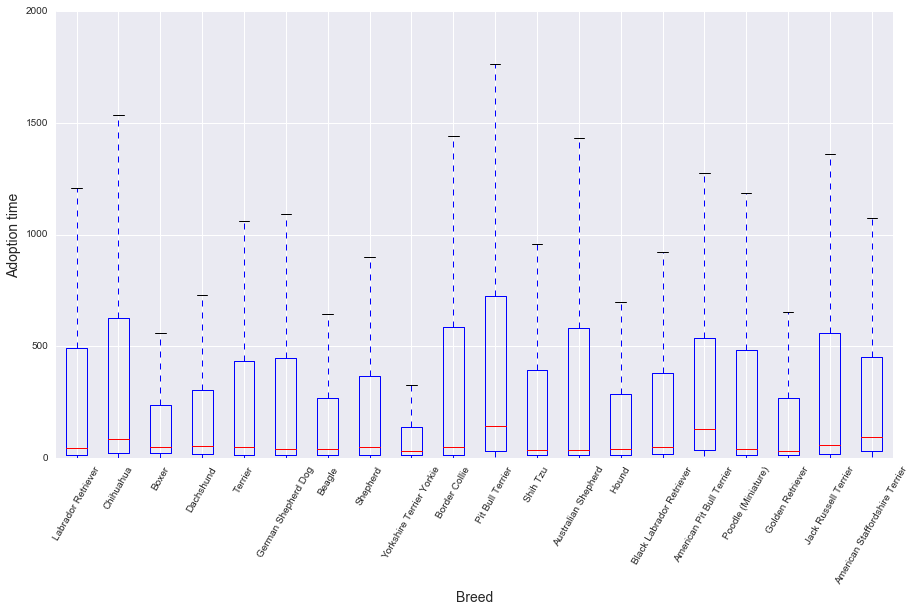

In [172]:
plt.subplots(figsize=(15, 8))
lst = [clean_df[clean_df['animalPrimaryBreed']==breed]['time_range'] for breed in top_20_breeds]
plt.boxplot(lst, labels=top_20_breeds)
plt.ylim(0, 2000)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Adoption time', fontsize=14)
plt.xticks(rotation=60)

In [135]:
df.columns

Index([u'animalAdoptionFee', u'animalAltered', u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalDeclawed', u'animalHousetrained',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalSizeCurrent', u'animalSizePotential', u'animalSpecialneeds',
       u'animalUptodate', u'adopted', u'censored', u'time_range',
       u'age_at_start', u'has_url', u'in_foster', u'Highly Active',
       u'Not Active', u'Slightly Active', u'animalAlterUnknown',
       u'animalDeclawedUnknown', u'animalMicrochippedUnknown', u'Adult',
       u'Baby', u'Senior', u'Young', u'Large', u'Medium', u'Small', u'X-Large',
       u'Indoor Only', u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive',
       u'Cautious', u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',

In [204]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 44 columns):
animalActivityLevel           152259 non-null object
animalAdoptionFee             152259 non-null float64
animalAltered                 94550 non-null float64
animalBiggestPictures         96174 non-null float64
animalBiggestVideos           96174 non-null float64
animalBreed                   152259 non-null object
animalColor                   124753 non-null object
animalDeclawed                32541 non-null float64
animalDescriptionPlain        152259 non-null object
animalGeneralAge              152259 non-null object
animalGeneralSizePotential    152259 non-null object
animalHousetrained            76945 non-null float64
animalIndoorOutdoor           152259 non-null object
animalLocationState           152259 non-null object
animalMicrochipped            73922 non-null float64
animalMixedBreed              110778 non-null float64
animalNeedsFoster             142862 no

In [177]:
clean_df.head()

,animalActivityLevel,animalAdoptionFee,animalAltered,animalBiggestPictures,animalBiggestVideos,animalBreed,animalColor,animalDeclawed,animalDescriptionPlain,animalGeneralAge,...,adopted,censored,time_range,age_at_start,has_url,in_foster,mostly_black,search_string_num_terms,description_length,has_video
0,NaN,265.08532,1.0,96769.0,0.0,Boxer,NaN,NaN,IN NEED OF A FOSTER HOME UNTIL I CAN BE ADOPTE...,Adult,...,1,0,47,7.0,1,0,0,5,1095,0
1,Moderately Active,265.08532,1.0,95768.0,0.0,Labrador Retriever / Boxer / Mixed,Black,NaN,"Hi! My name is Bianca, and if you can believe ...",Adult,...,1,0,136,5.0,1,0,1,13,478,0
2,Moderately Active,265.08532,1.0,98461.0,0.0,Labrador Retriever / Boxer / Mixed,NaN,NaN,"I'm Mick, and I think I'm pretty darn handsome...",Young,...,1,0,136,5.0,1,0,0,10,794,0
3,NaN,265.08532,1.0,84752.0,0.0,Boxer,NaN,NaN,IN NEED OF FOSTER CARE UNTIL I CAN BE ADOPTED....,NaN,...,1,0,33,2.0,1,0,0,7,642,0
4,Moderately Active,400.00000,1.0,64542.0,0.0,Poodle (Toy),White,NaN,Pierre is a petite little man with short legs ...,Adult,...,1,0,2562,3.0,1,0,0,8,965,0


In [191]:
for field in clean_categorical:
    print field, ":\n"
    print clean_df[field].value_counts() 

animalActivityLevel :

Moderately Active    77131
Highly Active        15743
Slightly Active       6965
Not Active             586
Name: animalActivityLevel, dtype: int64
animalGeneralAge :

Adult     47527
Baby      44611
Young     41863
Senior     4896
Name: animalGeneralAge, dtype: int64
animalGeneralSizePotential :

Medium     49096
Small      48160
Large      31131
X-Large     2881
Name: animalGeneralSizePotential, dtype: int64
animalIndoorOutdoor :

Indoor Only           47151
Indoor and Outdoor    34253
Outdoor Only            135
Name: animalIndoorOutdoor, dtype: int64
animalMicrochipped :

0.0    40838
1.0    33084
Name: animalMicrochipped, dtype: int64
animalNewPeople :

Friendly      56660
Cautious       5038
Protective      214
Aggressive       29
Name: animalNewPeople, dtype: int64
animalPrimaryBreed :

Labrador Retriever                         14886
Chihuahua                                   9895
Boxer                                       7953
Dachshund                

In [206]:
for field in clean_numeric:
    print field, ":\n"
    print clean_df[field].value_counts() 

animalAltered :

1.0    83000
0.0    11550
Name: animalAltered, dtype: int64
animalBiggestPictures :

0.0         2637
26005.0       14
47386.0       13
59424.0       11
90167.0       10
27940.0       10
63998.0        9
37671.0        9
27357.0        9
40686.0        9
236338.0       9
51623.0        9
45452.0        9
53985.0        9
142637.0       8
32982.0        8
53311.0        8
53325.0        8
53387.0        8
59895.0        8
48487.0        8
46144.0        8
53939.0        8
67962.0        8
53143.0        8
46518.0        8
46586.0        8
62346.0        8
44708.0        8
61046.0        8
            ... 
74657.0        1
74655.0        1
74652.0        1
74646.0        1
74708.0        1
74714.0        1
74766.0        1
74716.0        1
74764.0        1
74757.0        1
74756.0        1
74754.0        1
74752.0        1
74750.0        1
74749.0        1
74747.0        1
74746.0        1
74745.0        1
74744.0        1
74742.0        1
74738.0        1
74737.0       

In [205]:
clean_categorical= [ u'animalMicrochipped', ]
clean_numeric = [u'animalAltered',
       u'animalBiggestPictures', u'animalBiggestVideos', u'animalDeclawed', u'animalHousetrained',u'animalMixedBreed', u'animalNeedsFoster',
                 u'animalNumPictures', u'animalNumVideos',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',u'animalSex', u'animalSizeCurrent',
       u'animalSizePotential', u'animalSpecialneeds', u'animalUptodate',u'age_at_start']

In [197]:
fill_with_mode= ['animalActivityLevel', u'animalGeneralAge', u'animalGeneralSizePotential',
        u'animalIndoorOutdoor',u'animalNewPeople', 
        u'animalPrimaryBreed',
       u'animalSecondaryBreed']
for field in fill_with_unknown:
    clean_df[field]=clean_df[field].fillna("Unknown")

In [203]:
clean_df[clean_df['animalMixedBreed']==1][['animalMixedBreed', 'animalSecondaryBreed']]

,animalMixedBreed,animalSecondaryBreed
1,1.0,Boxer
2,1.0,Boxer
5,1.0,Australian Shepherd
8,1.0,Unknown
9,1.0,Australian Cattle Dog/Blue Heeler
12,1.0,Unknown
14,1.0,Unknown
17,1.0,Shih Tzu
18,1.0,Shih Tzu
20,1.0,Terrier


In [202]:
clean_df['animalSecondaryBreed']=clean_df['animalSecondaryBreed'].replace('', "Unknown")